<a href="https://colab.research.google.com/github/cliu001/Iris/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k=1, Inertia=600.0000000000001
k=2, Inertia=222.36170496502302
k=3, Inertia=139.82049635974982
k=4, Inertia=114.35407164049776
k=5, Inertia=90.92751382392049
k=6, Inertia=80.02218752722621
k=7, Inertia=71.03343108154417
k=8, Inertia=62.51430580335557
k=9, Inertia=54.09786462356245
k=10, Inertia=47.51904068157667


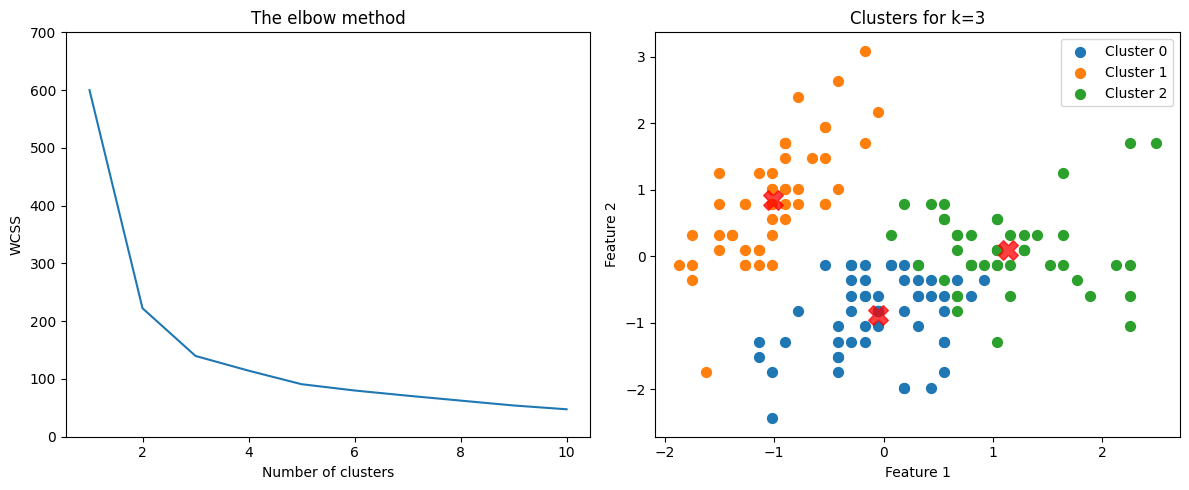

Accuracy with PCA: 0.9173
Training Time with PCA: 24.3400 seconds
Accuracy without PCA: 0.9207
Training Time without PCA: 199.2457 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Optional Step 2: Standardize the feature matrix
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 3: Perform k-Means clustering with different values of k
inertia_values = []

# Define a range of k values to try
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_std)
    inertia_values.append(kmeans.inertia_)

# Step 4: Calculate the Within-Cluster-Sum-of-Squares (WCSS) or inertia
for k, inertia in zip(k_values, inertia_values):
    print(f'k={k}, Inertia={inertia}')

# Step 5: Plot the inertia values for different values of k
plt.figure(figsize=(12, 5))

# Subplot 1: Inertia values
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ylim(0, 700)  # Set y-axis limits
plt.title('The elbow method')

# Subplot 2: Visualize clusters and centroids for the chosen k
chosen_k = 3  # Change this to your chosen number of clusters
kmeans_chosen = KMeans(n_clusters=chosen_k, random_state=0, n_init=10)
kmeans_chosen.fit(X_std)
y_kmeans = kmeans_chosen.predict(X_std)
centers = kmeans_chosen.cluster_centers_

plt.subplot(1, 2, 2)
for cluster in range(chosen_k):
    plt.scatter(X_std[y_kmeans == cluster, 0], X_std[y_kmeans == cluster, 1], label=f'Cluster {cluster}', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Clusters for k={chosen_k}')
plt.legend()

plt.tight_layout()
plt.show()
# task 2

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser='pandas', data_home="./data")

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA for dimensionality reduction
n_components = 100  # Number of components for PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Apply logistic regression with PCA
start_time = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=2000, C=0.1)
logisticRegr_pca.fit(X_train_pca, y_train)
end_time = time.time()
time_pca = end_time - start_time

# Step 6: Get accuracy with PCA
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Training Time with PCA: {time_pca:.4f} seconds")

# Step 7: Apply logistic regression without PCA
start_time = time.time()
logisticRegr_no_pca = LogisticRegression(solver='lbfgs', max_iter=2000, C=0.1)
logisticRegr_no_pca.fit(X_train_scaled, y_train)
end_time = time.time()
time_no_pca = end_time - start_time

# Step 8: Get accuracy without PCA
y_pred_no_pca = logisticRegr_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Compare accuracies
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")

# Compare times
print(f"Training Time without PCA: {time_no_pca:.4f} seconds")



